# Bank Series

We will propose a relevant and exhaustive market risk analysis of a Bank. The bank is **JP Morgan**

## Import Libraries

In [74]:
import yfinance as yf
import pandas as pd
import numpy as np
import Series_Functions as sf
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = [15, 8]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Donwload the data

In [75]:
ticker = 'JPM'
prices = sf.get_data(ticker)

We compute the returns

In [76]:
returns = sf.get_returns(prices)

We plot the returns for the bank

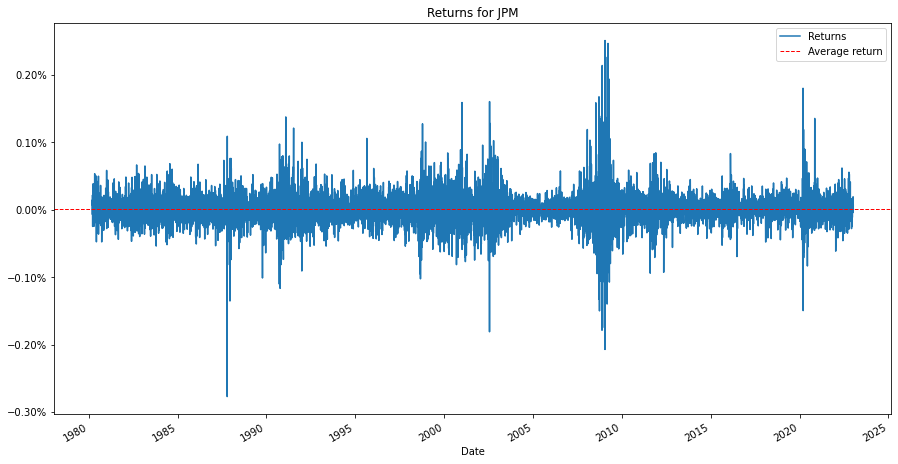

In [77]:
sf.plot_returns(returns, ticker)

## Estimation of the VaR

Qu'est ce que la **VaR** : Une mesure de la perte maximale potentielle sur une période de temps donnée avec une certaine probabilité.

### Non parametric method

In [78]:
VaR_NonParam = sf.weighted_hs_var(returns=returns, confidence_level=95)

VaR au niveau de confiance 95% : 0.0338


### Parametric method

In [79]:
returns

Date
1980-03-18 00:00:00-05:00    0.007353
1980-03-19 00:00:00-05:00    0.014599
1980-03-20 00:00:00-05:00   -0.007193
1980-03-21 00:00:00-05:00    0.021738
1980-03-24 00:00:00-05:00   -0.024822
                               ...   
2023-01-04 00:00:00-05:00    0.009325
2023-01-05 00:00:00-05:00   -0.000222
2023-01-06 00:00:00-05:00    0.019136
2023-01-09 00:00:00-05:00   -0.004132
2023-01-10 00:00:00-05:00    0.006661
Name: Close, Length: 10796, dtype: float64

In [80]:
returns.values

array([ 0.00735306,  0.01459856, -0.00719331, ...,  0.01913555,
       -0.00413228,  0.00666091])

In [81]:
p,q = sf.optimize_garch(returns)
print(f'p = {p} et q = {q}')

AssertionError: 